In [1]:
import psi4
import re as re
import matplotlib.pyplot as plt
import fortecubeview as vis

# 1. Singlepoint energy calculation

## Let's calculate electronic energy of a $H_2$ molecule.

In [2]:
h2 = """
    0 1
    H 0.0 0.0 0.0
    H 0.0 0.0 1.5
    unit bohr
"""

psi4.set_options({'basis': '6-31g',
                  'reference': 'rhf'})

psi4.core.set_output_file('singlepoint.out')

E = psi4.energy('scf', molecule = psi4.geometry(h2))

print("Energy of a hydrogen molecule: %.7f Hartree" %E)

Energy of a hydrogen molecule: -1.1242111 Hartree


# 2. Potential curve
## We can adjust the bond length and calculate energies to plot a potential curve plot.

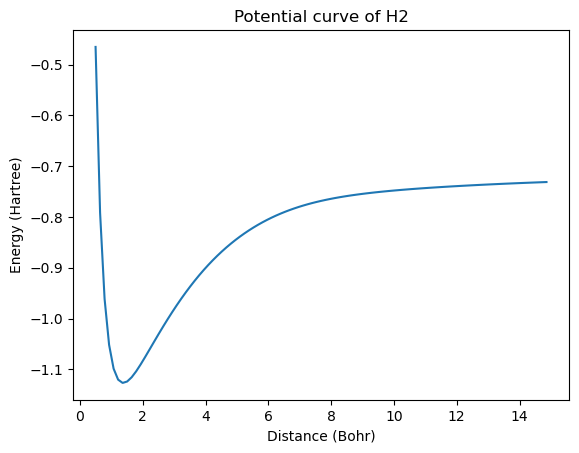

In [3]:
h2 = """
    0 1
    H 0.0 0.0 0.0
    H 0.0 0.0 R
    unit bohr
"""

psi4.set_options({'basis': '6-31g',
                  'reference': 'rhf'})

psi4.core.set_output_file('PES.out')

N = 101
R_min = 0.5
R_max = 15.0

dr = (R_max - R_min)/N

Rvals = []
E = []

for i in range(N):
    dis = R_min + i*dr
    h2_new = re.sub("R", str(dis), h2)
    Energy = psi4.energy('scf', molecule = psi4.geometry(h2_new))
    Rvals.append(dis)
    E.append(Energy)

fig, ax = plt.subplots()
ax.set_title('Potential curve of H2')
ax.set(xlabel = 'Distance (Bohr)', ylabel = 'Energy (Hartree)')
ax.plot(Rvals, E)
plt.show()